<h1>Uczenie i porównanie modeli</h1>

In [22]:
from ium_recommendations.models.model import *
from ium_recommendations.features.build_features import *
from random import *
from ium_recommendations.visualization.visualize import *

# Fix random seed for reproducibility
SEED = 13
numpy.random.seed(SEED)

In [2]:
# Prepare data
max_session_length = 20
(x1_train, x2_train, y_train), (x1_test, x2_test, y_test), max_products, max_categories = get_data(max_session_length, test_size=0.2, random_state=SEED)

<h2>Model 1 - ModelSimple</h2>

In [3]:
# Create model
model1 = ModelSimple(max_session_length, max_products, max_categories)
model1.create()
model1.summary()

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               229888    
_________________________________________________________________
dense_1 (Dense)              (None, 320)               41280     
Total params: 271,168
Trainable params: 271,168
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
97/97 [==============================] - 8s 50ms/step - loss: 3.6957 - accuracy: 0.2410 - val_loss: 3.2750 - val_accuracy: 0.2037
Epoch 2/100
97/97 [==============================] - 5s 52ms/step - loss: 3.2733 - accuracy: 0.2490 - val_loss: 3.2777 - val_accuracy: 0.2469
Epoch 3/100
97/97 [==============================] - 4s 39ms/step - loss: 3.2682 - accuracy: 0.2450 - val_loss: 3.2841 - val_accuracy: 0.2469
Epoch 4/100
97/97 [==============================] - 4s 42ms/step - loss: 3.2634 - accuracy: 0.2511 - val_loss: 3.2874 - val_accuracy: 0.2469
Epoch 5/100
97/97 [==============================] - 4s 43ms/step - loss: 3.2651 - accuracy: 0.2531 - val_loss: 3.2834 - val_accuracy: 0.2508
Epoch 6/100
97/97 [==============================] - 4s 44ms/step - loss: 3.2605 - accuracy: 0.2439 - val_loss: 3.2897 - val_accuracy: 0.2521
Epoch 7/100
97/97 [==============================] - 4s 45ms/step - loss: 3.1344 - accuracy: 0.3547 - val_loss: 2.9909 - val_accuracy: 0.4133
Epoch 

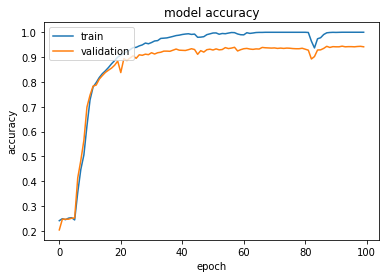

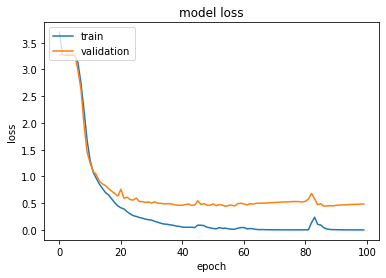

In [4]:
# Train model
history1 = model1.train(x1_train, y_train, 100)
print(history1)
visualize(history1, 'accuracy')
visualize(history1, 'loss')

In [5]:
# Evaluate on test set
scores1 = model1.evaluate(x1_test, y_test)
print("Accuracy: %.2f%%" % (scores1[1]*100))

Accuracy: 93.65%


In [6]:
model1.save("ModelSimple1")

INFO:tensorflow:Assets written to: models\ModelSimple1\assets


INFO:tensorflow:Assets written to: models\ModelSimple1\assets


<h2>Model 2 - ModelEmbedding</h2>

In [7]:
# Create model
model2 = ModelEmbedding(max_session_length, max_products, max_categories)
model2.create()
model2.summary()

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 128)           40960     
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 320)               41280     
Total params: 213,824
Trainable params: 213,824
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
97/97 [==============================] - 8s 45ms/step - loss: 3.6825 - accuracy: 0.2319 - val_loss: 3.2759 - val_accuracy: 0.2469
Epoch 2/100
97/97 [==============================] - 2s 25ms/step - loss: 3.2722 - accuracy: 0.2477 - val_loss: 3.2774 - val_accuracy: 0.2469
Epoch 3/100
97/97 [==============================] - 3s 31ms/step - loss: 3.2668 - accuracy: 0.2489 - val_loss: 3.2799 - val_accuracy: 0.2515
Epoch 4/100
97/97 [==============================] - 3s 33ms/step - loss: 3.2661 - accuracy: 0.2484 - val_loss: 3.2906 - val_accuracy: 0.2508
Epoch 5/100
97/97 [==============================] - 4s 38ms/step - loss: 3.2658 - accuracy: 0.2545 - val_loss: 3.2858 - val_accuracy: 0.2508
Epoch 6/100
97/97 [==============================] - 4s 40ms/step - loss: 3.2613 - accuracy: 0.2566 - val_loss: 3.2821 - val_accuracy: 0.2521
Epoch 7/100
97/97 [==============================] - 4s 39ms/step - loss: 3.1955 - accuracy: 0.3103 - val_loss: 2.9315 - val_accuracy: 0.4417
Epoch 

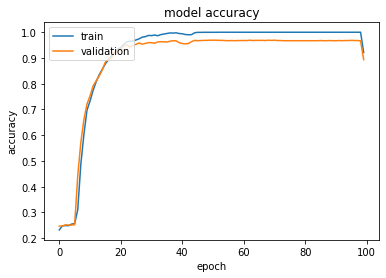

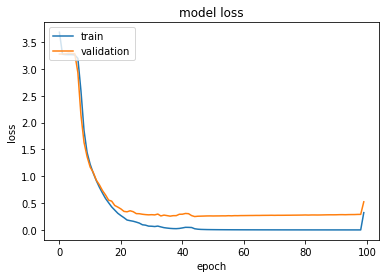

In [8]:
# Train model
history2 = model2.train(x1_train, y_train, 100)
print(history2)
visualize(history2, 'accuracy')
visualize(history2, 'loss')

In [9]:
# Evaluate on test set
scores2 = model2.evaluate(x1_test, y_test)
print("Accuracy: %.2f%%" % (scores2[1]*100))

Accuracy: 89.68%


In [38]:
model2.save("ModelEmbedding1")

INFO:tensorflow:Assets written to: models\ModelEmbedding1\assets


INFO:tensorflow:Assets written to: models\ModelEmbedding1\assets


<h2>Model 3 - ModelCategories</h2>

In [11]:
# Create model
model3 = ModelCategories(max_session_length, max_products, max_categories)
model3.create()
model3.summary()

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 20)]         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 20, 128)      40960       input_7[0][0]                    
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 20, 128)      2048        input_8[0][0]                    
____________________________________________________________________________________________

Epoch 1/100
97/97 [==============================] - 14s 91ms/step - loss: 3.6411 - accuracy: 0.2405 - val_loss: 3.2817 - val_accuracy: 0.2469
Epoch 2/100
97/97 [==============================] - 5s 55ms/step - loss: 3.2745 - accuracy: 0.2529 - val_loss: 3.2874 - val_accuracy: 0.2037
Epoch 3/100
97/97 [==============================] - 6s 65ms/step - loss: 3.2729 - accuracy: 0.2411 - val_loss: 3.2986 - val_accuracy: 0.2037
Epoch 4/100
97/97 [==============================] - 6s 59ms/step - loss: 3.2695 - accuracy: 0.2408 - val_loss: 3.2821 - val_accuracy: 0.2469
Epoch 5/100
97/97 [==============================] - 6s 60ms/step - loss: 3.2671 - accuracy: 0.2435 - val_loss: 3.2847 - val_accuracy: 0.2469
Epoch 6/100
97/97 [==============================] - 5s 54ms/step - loss: 3.2609 - accuracy: 0.2531 - val_loss: 3.2871 - val_accuracy: 0.2469
Epoch 7/100
97/97 [==============================] - 6s 67ms/step - loss: 3.2594 - accuracy: 0.2516 - val_loss: 3.2837 - val_accuracy: 0.2508
Epoch

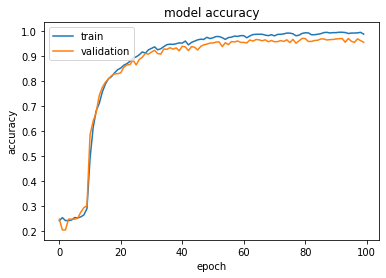

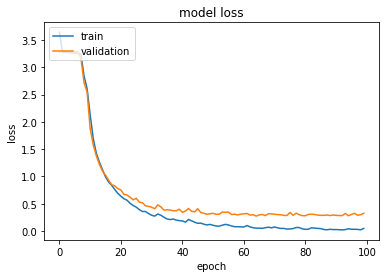

In [12]:
# Train model
history3 = model3.train([x1_train, x2_train], y_train, 100)
print(history3)
visualize(history3, 'accuracy')
visualize(history3, 'loss')

In [13]:
# Evaluate on test set
scores3 = model3.evaluate([x1_test, x2_test], y_test)
print("Accuracy: %.2f%%" % (scores3[1]*100))

Accuracy: 95.77%


In [15]:
model3.save("ModelCategories1")

INFO:tensorflow:Assets written to: models\ModelCategories1\assets


INFO:tensorflow:Assets written to: models\ModelCategories1\assets


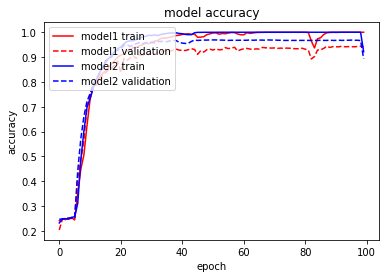

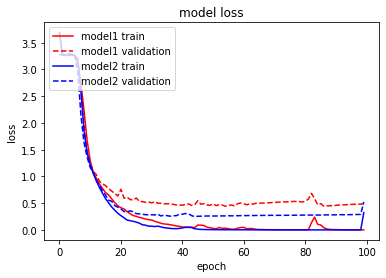

In [49]:
visualize_histories(history1, history2, 'accuracy', 'comp_models12_accuracy.png', 'model1', 'model2', 'red', 'blue')
visualize_histories(history1, history2, 'loss',     'comp_models12_loss.png',     'model1', 'model2', 'red', 'blue')

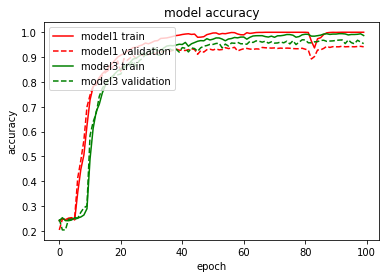

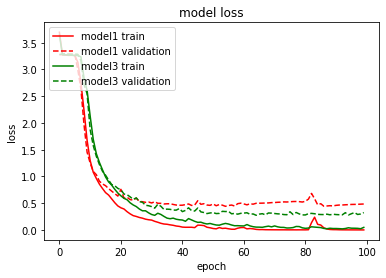

In [48]:
visualize_histories(history1, history3, 'accuracy', 'comp_models13_accuracy.png', 'model1', 'model3', 'red', 'green')
visualize_histories(history1, history3, 'loss',     'comp_models13_loss.png',     'model1', 'model3', 'red', 'green')

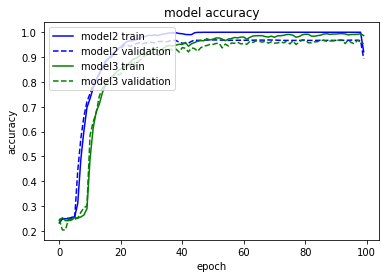

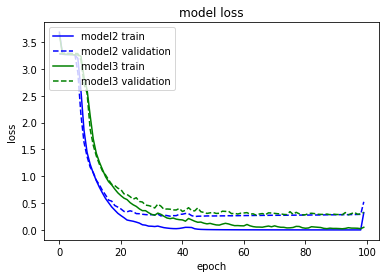

In [47]:
visualize_histories(history2, history3, 'accuracy', 'comp_models23_accuracy.png', 'model2', 'model3', 'blue', 'green')
visualize_histories(history2, history3, 'loss',     'comp_models23_loss.png',     'model2', 'model3', 'blue', 'green')